In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
#import csv file(Cause of deaths) as COD
cod = pd.read_csv('cause_of_deaths.csv')

In [3]:
cod = pd.DataFrame(cod)

In [4]:
cod.head()

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816


In [5]:
cod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 34 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Country/Territory                           6120 non-null   object
 1   Code                                        6120 non-null   object
 2   Year                                        6120 non-null   int64 
 3   Meningitis                                  6120 non-null   int64 
 4   Alzheimer's Disease and Other Dementias     6120 non-null   int64 
 5   Parkinson's Disease                         6120 non-null   int64 
 6   Nutritional Deficiencies                    6120 non-null   int64 
 7   Malaria                                     6120 non-null   int64 
 8   Drowning                                    6120 non-null   int64 
 9   Interpersonal Violence                      6120 non-null   int64 
 10  Maternal Disorders      

In [6]:
cod.describe()

,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
count,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,...,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6.120000e+03,6120.000000,6120.000000,6120.000000,6120.000000
mean,2004.500000,1719.701307,4864.189379,1173.169118,2253.600000,4140.960131,1683.333170,2083.797222,1262.589216,5941.898529,...,5138.704575,4724.132680,425.013399,1965.994281,5930.795588,1.709237e+04,6124.072059,10725.267157,588.711438,618.429902
std,8.656149,6672.006930,18220.659072,4616.156238,10483.633601,18427.753137,8877.018366,6917.006075,6057.973183,21011.962487,...,16773.081040,16470.429969,2022.640521,8255.999063,24097.784291,1.051572e+05,20688.118580,37228.051096,2128.595120,4186.023497
min,1990.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1997.000000,15.000000,90.000000,27.000000,9.000000,0.000000,34.000000,40.000000,5.000000,11.000000,...,236.000000,145.750000,6.000000,5.000000,174.750000,2.890000e+02,154.000000,284.000000,17.000000,2.000000
50%,2004.500000,109.000000,666.500000,164.000000,119.000000,0.000000,177.000000,265.000000,54.000000,136.000000,...,1087.000000,822.000000,52.500000,92.000000,966.500000,1.689000e+03,1210.000000,2185.000000,126.000000,15.000000
75%,2012.000000,847.250000,2456.250000,609.250000,1167.250000,393.000000,698.000000,877.000000,734.000000,1879.000000,...,2954.000000,2922.500000,254.000000,1042.500000,3435.250000,5.249750e+03,3547.250000,6080.000000,450.000000,160.000000
max,2019.000000,98358.000000,320715.000000,76990.000000,268223.000000,280604.000000,153773.000000,69640.000000,107929.000000,305491.000000,...,273089.000000,222922.000000,30883.000000,202241.000000,329237.000000,1.366039e+06,270037.000000,464914.000000,25876.000000,64305.000000


In [7]:
#search for null values
null_columns = cod.columns[cod.isnull().any()]
null_columns

Index([], dtype='object')

In [8]:
#search for duplicates
duplicated = cod.duplicated()
duplicated

0       False
1       False
2       False
3       False
4       False
        ...  
6115    False
6116    False
6117    False
6118    False
6119    False
Length: 6120, dtype: bool

In [9]:
#no null values, no duplicated values, and no data types to be changed
#standardize text data
#triming whitespaces
cod['Country/Territory'] = cod['Country/Territory'].str.strip()
cod['Code'] = cod['Code'].str.strip()

In [10]:
#look for all unique values in Country/Territory to ensure country names are correct and consistent with no typos
unique_names = cod['Country/Territory'].unique()
print(unique_names)

['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba'
 'Cyprus' 'Czechia' 'Democratic Republic of Congo' 'Denmark' 'Djibouti'
 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji'
 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Greenland' 'Grenada' 'Guam' 'Guatemala' 'Guinea' 'Guinea-Bissau'
 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia'
 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 

In [11]:
#Create a new Total column for total death cases in a country in a certain year
columns_to_exclude = ['Country/Territory','Code','Year']
cod['Total'] = cod.drop(columns=columns_to_exclude).sum(axis=1)
cod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Country/Territory                           6120 non-null   object
 1   Code                                        6120 non-null   object
 2   Year                                        6120 non-null   int64 
 3   Meningitis                                  6120 non-null   int64 
 4   Alzheimer's Disease and Other Dementias     6120 non-null   int64 
 5   Parkinson's Disease                         6120 non-null   int64 
 6   Nutritional Deficiencies                    6120 non-null   int64 
 7   Malaria                                     6120 non-null   int64 
 8   Drowning                                    6120 non-null   int64 
 9   Interpersonal Violence                      6120 non-null   int64 
 10  Maternal Disorders      

In [12]:
#add a unique key column that combines country code and year
cod['Unique_Key'] = cod['Code'] + cod['Year'].astype(str)
cod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 36 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Country/Territory                           6120 non-null   object
 1   Code                                        6120 non-null   object
 2   Year                                        6120 non-null   int64 
 3   Meningitis                                  6120 non-null   int64 
 4   Alzheimer's Disease and Other Dementias     6120 non-null   int64 
 5   Parkinson's Disease                         6120 non-null   int64 
 6   Nutritional Deficiencies                    6120 non-null   int64 
 7   Malaria                                     6120 non-null   int64 
 8   Drowning                                    6120 non-null   int64 
 9   Interpersonal Violence                      6120 non-null   int64 
 10  Maternal Disorders      

In [13]:
cod.head()

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,Total,Unique_Key
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,338,2054,4154,5945,2673,5005,323,2985,147971,AFG1990
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,351,2119,4472,6050,2728,5120,332,3092,156844,AFG1991
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,386,2404,5106,6223,2830,5335,360,3325,169156,AFG1992
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,425,2797,5681,6445,2943,5568,396,3601,182230,AFG1993
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,451,3038,6001,6664,3027,5739,420,3816,194795,AFG1994


In [14]:
#exporting to new csv file
cod.to_csv('Causes of death (Cleaned).csv', index=False)

In [14]:
# Group by country and year and aggregate causes of death
cod_grouped = cod.groupby(['Country/Territory', 'Year']).sum().reset_index()
print(cod_grouped.head())

  Country/Territory  Year Code  Meningitis  \
0       Afghanistan  1990  AFG        2159   
1       Afghanistan  1991  AFG        2218   
2       Afghanistan  1992  AFG        2475   
3       Afghanistan  1993  AFG        2812   
4       Afghanistan  1994  AFG        3027   

   Alzheimer's Disease and Other Dementias  Parkinson's Disease  \
0                                     1116                  371   
1                                     1136                  374   
2                                     1162                  378   
3                                     1187                  384   
4                                     1211                  391   

   Nutritional Deficiencies  Malaria  Drowning  Interpersonal Violence  ...  \
0                      2087       93      1370                    1538  ...   
1                      2153      189      1391                    2001  ...   
2                      2441      239      1514                    2299  ...   
3   

In [18]:
# Summary statistics for each cause of death
cause_columns = cod.columns[3:-1]
summary_stats = cod[cause_columns].describe()
print(summary_stats)

         Meningitis  Alzheimer's Disease and Other Dementias  \
count   6120.000000                              6120.000000   
mean    1719.701307                              4864.189379   
std     6672.006930                             18220.659072   
min        0.000000                                 0.000000   
25%       15.000000                                90.000000   
50%      109.000000                               666.500000   
75%      847.250000                              2456.250000   
max    98358.000000                            320715.000000   

       Parkinson's Disease  Nutritional Deficiencies        Malaria  \
count          6120.000000               6120.000000    6120.000000   
mean           1173.169118               2253.600000    4140.960131   
std            4616.156238              10483.633601   18427.753137   
min               0.000000                  0.000000       0.000000   
25%              27.000000                  9.000000       0.000000 

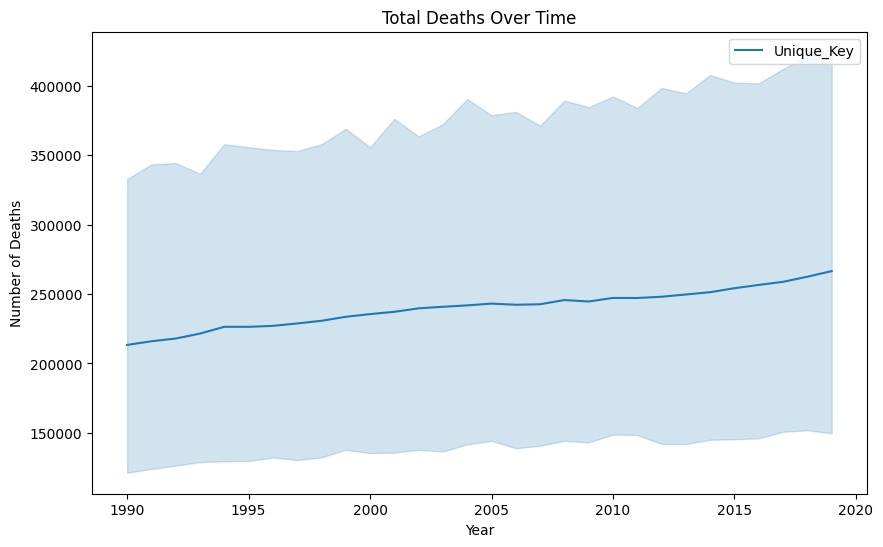

In [19]:
# Plot trends for total deaths over the years
plt.figure(figsize=(10,6))
sns.lineplot(data=cod_grouped, x='Year', y='Total', label=cause)
plt.title('Total Deaths Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.legend()
plt.show()


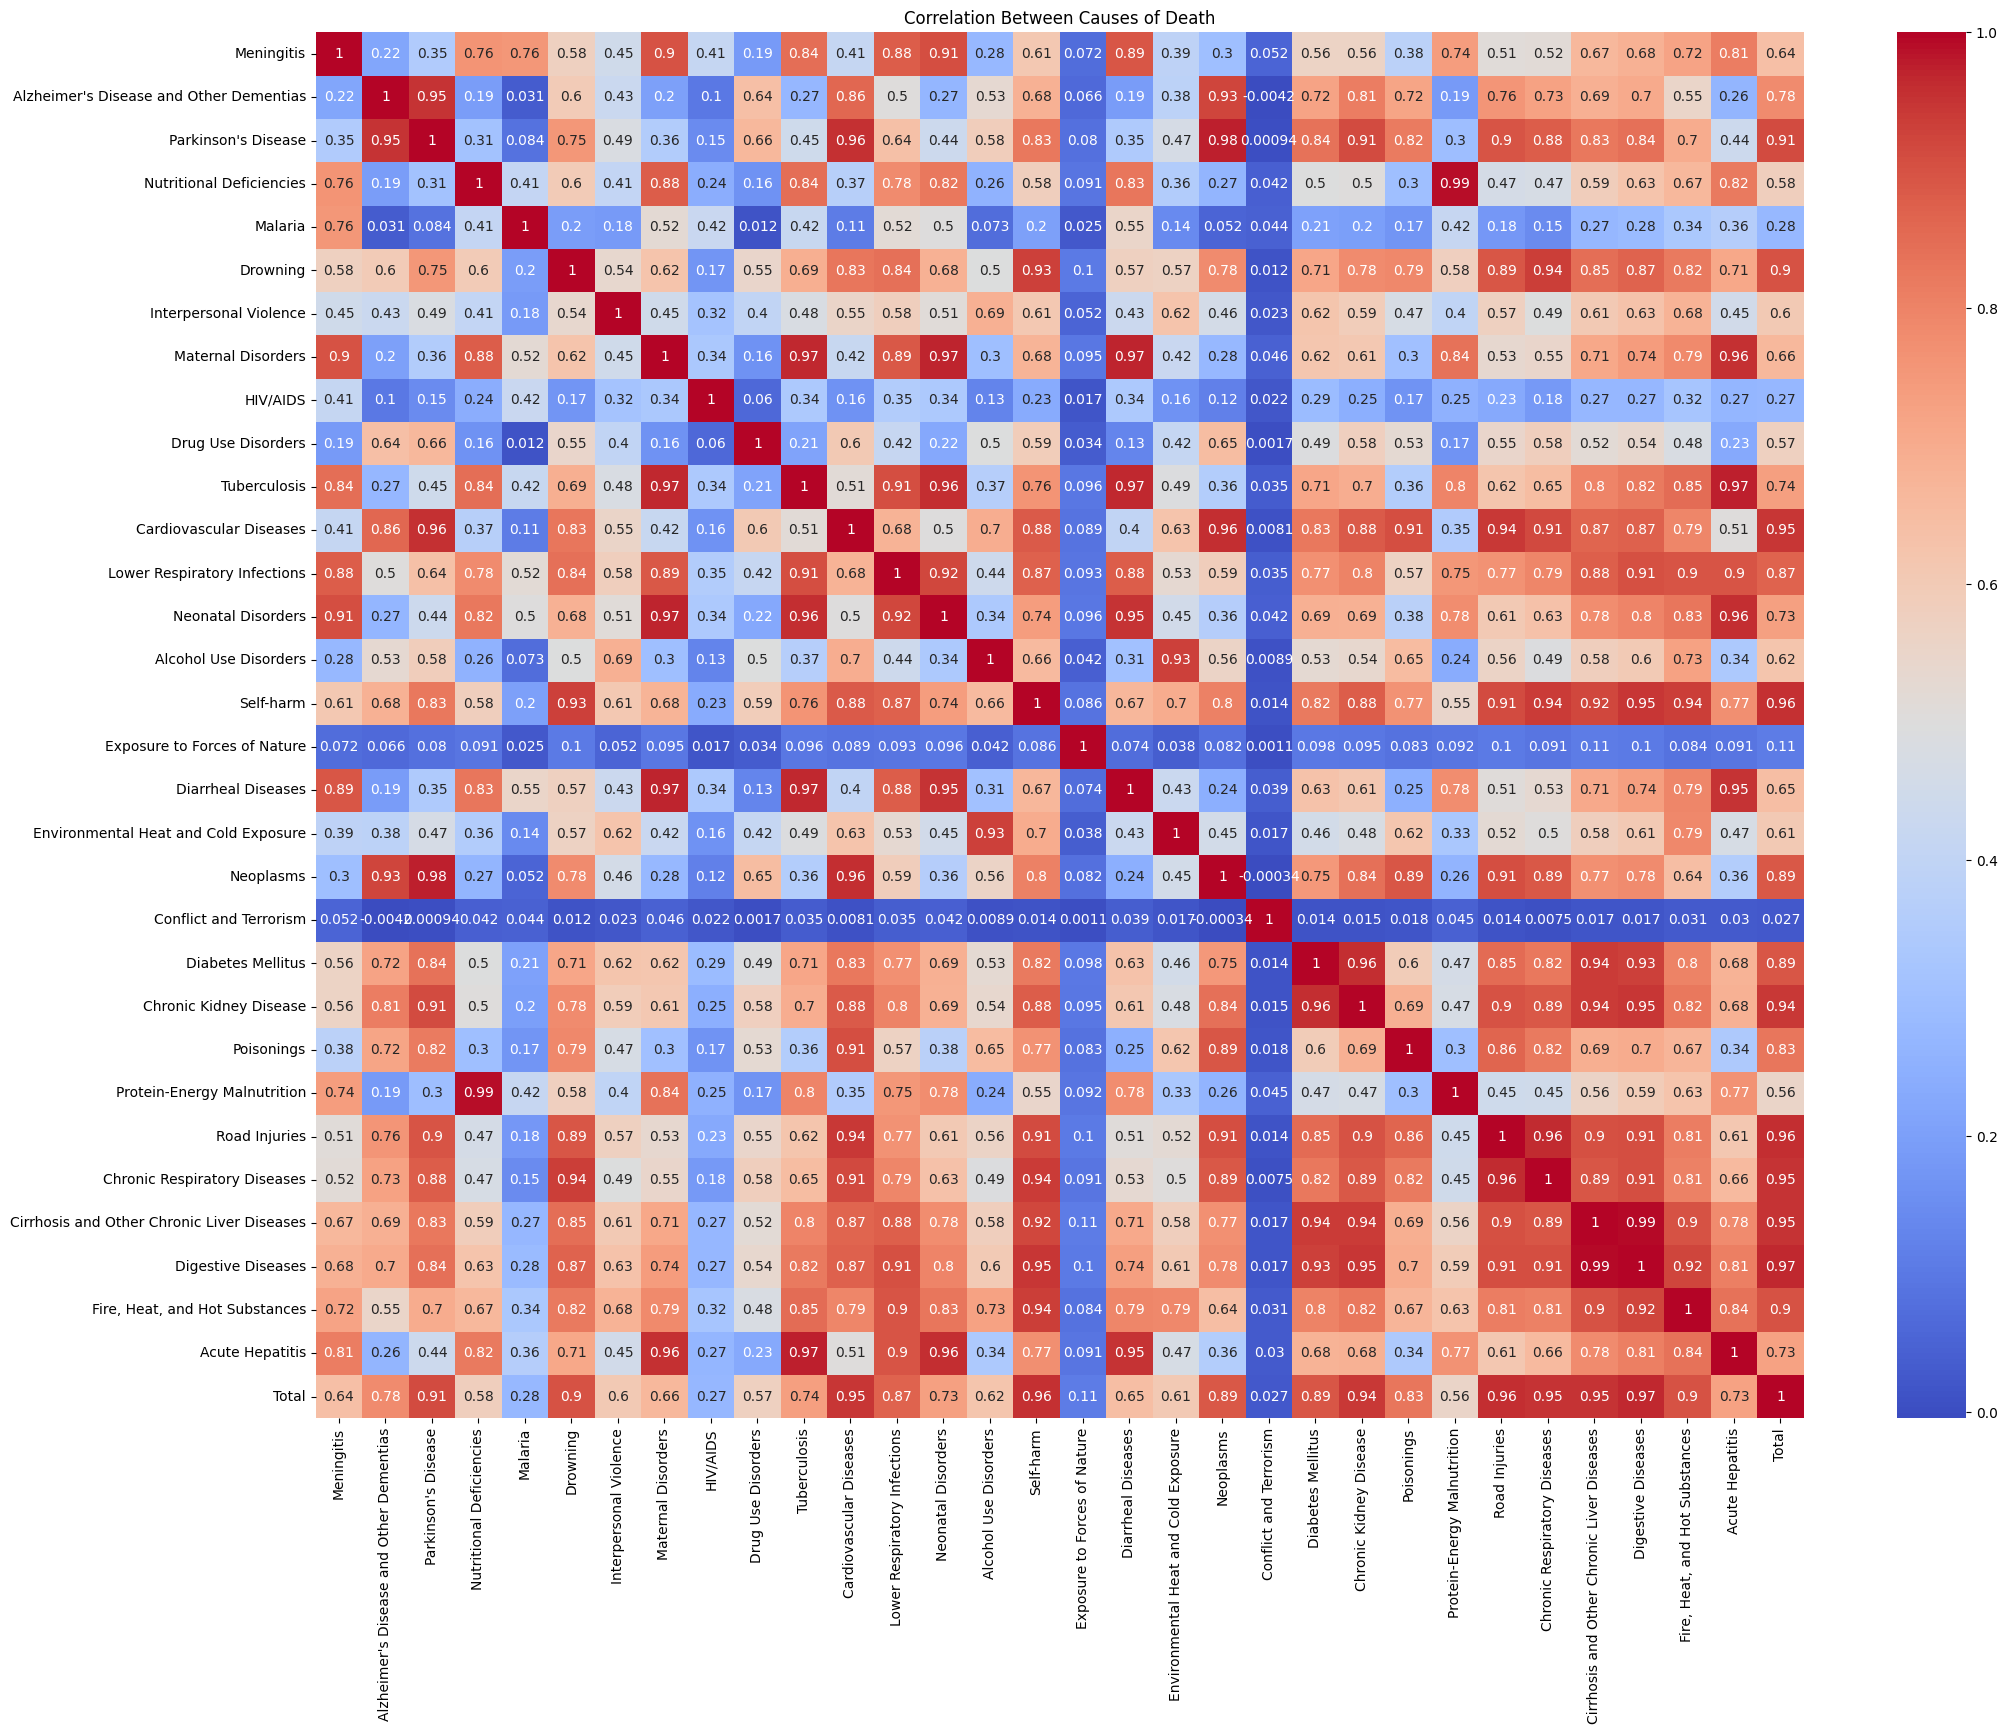

In [27]:
# Calculate the correlation matrix
correlation_matrix = cod[cause_columns].corr()
# Visualize the correlation matrix
plt.figure(figsize=(24,18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Causes of Death')
plt.show()


In [30]:
# Define the feature (X) and the target (y)
X = cod[['Year']]  # Using Year as the feature
y = cod['Total']   # Predicting the Total deaths

In [31]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Create a linear regression model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [34]:
# Predict on the test set
y_pred = model.predict(X_test)
# Example: Predict for future years (2030, 2035, 2040)
future_years = pd.DataFrame({'Year': [2030, 2035, 2040]})
future_predictions = model.predict(future_years)

print(f'Predicted total deaths in 2030: {future_predictions[0]}')
print(f'Predicted total deaths in 2035: {future_predictions[1]}')
print(f'Predicted total deaths in 2040: {future_predictions[2]}')


Predicted total deaths in 2030: 272840.8655659284
Predicted total deaths in 2035: 278456.65790743823
Predicted total deaths in 2040: 284072.45024894807


In [35]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate MAE and R-squared
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')


Mean Absolute Error: 292199.9294598426
R-squared: -3.526264295872217e-05


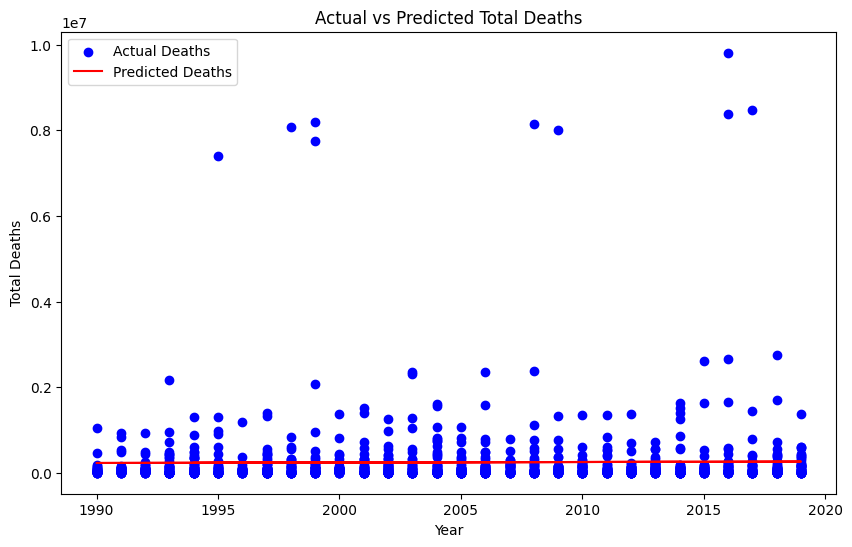

In [36]:
# Plot actual vs predicted deaths
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color='blue', label='Actual Deaths')
plt.plot(X_test, y_pred, color='red', label='Predicted Deaths')
plt.title('Actual vs Predicted Total Deaths')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.legend()
plt.show()